In [141]:
import pandas as pd
import numpy as np
import requests 
import os
import csv
import json as jsn
from pprint import pprint
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st
from matplotlib import pyplot as plt

In [58]:
food_df = pd.read_csv('Resources/narrowed.csv')

In [59]:
food_df.head()

,TRACT_NAME,County,"Hospitalization_Census_Tract_Rate_per_100,000","Hospitlization_State_Rate_per_100,000",Adult_Pop_Over_18,Census_Tract_Estimate,Pop_Total,Pop_Density/Sq_Mile,Percent_Poverty,Median_Household_Income,Poverty_Mean_Household_Income,Per_Capita_Income,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,Low_Income_Tract
0,"Census Tract 9790, Fremont County, Colorado",FREMONT,716.97,1267.78,2994,10.0,3471,3.4,9.7,49483.0,61677.0,29749,1,1,0,0,0,1,1
1,"Census Tract 9516, Garfield County, Colorado",GARFIELD,602.99,1267.78,2800,5.0,3656,6.4,14.5,59154.0,82512.0,32362,0,0,0,0,0,1,0
2,"Census Tract 28.03, Larimer County, Colorado",LARIMER,0.00,1267.78,97,1.6,97,0.4,38.1,43882.0,41385.0,27278,0,0,0,0,0,1,0
3,"Census Tract 9632, Yuma County, Colorado",YUMA,1390.98,1267.78,4381,8.0,5467,5.3,13.4,44315.0,53229.0,24196,1,1,0,0,0,1,1
4,"Census Tract 24.01, Larimer County, Colorado",LARIMER,529.77,1267.78,1190,8.0,1310,3.3,10.2,61111.0,83656.0,39123,1,1,1,1,0,1,1


In [60]:
food_df.dtypes

TRACT_NAME                                        object
County                                            object
Hospitalization_Census_Tract_Rate_per_100,000    float64
Hospitlization_State_Rate_per_100,000            float64
Adult_Pop_Over_18                                  int64
Census_Tract_Estimate                            float64
Pop_Total                                          int64
Pop_Density/Sq_Mile                              float64
Percent_Poverty                                  float64
Median_Household_Income                          float64
Poverty_Mean_Household_Income                    float64
Per_Capita_Income                                  int64
LILATracts_1And10                                  int64
LILATracts_halfAnd10                               int64
LILATracts_1And20                                  int64
LILATracts_Vehicle                                 int64
Urban                                              int64
Rural                          

In [131]:
#find how many Census tracts you are working with
colorado_tracts = food_df['TRACT_NAME'].count()
colorado_tracts

1228

# Understanding LILA Tracts
United States Department of Agriculture 

~LI status is determined by poverty rates (at least 20 percent) or median family income (at or
below 80 percent of the metropolitan area or State median income) in each census tract. 
 
~The number of census tracts classified as LI increased from 29,285 in 2010 to 30,870 in
2015, or 5.41 percent

~LA status of a tract is measured four ways. Three of these measures are based solely on proximity to the nearest store, demarcated by the use of different distance thresholds (0.5 and 1 mile
in urban areas; 10 and 20 miles in rural areas). The fourth measure is based on the number of
households without a vehicle that are more than 0.5 mile from the nearest store and the number
and share of people more than 20 miles from the nearest store. 

~The number of tracts that are classified as low access (LA) based solely on proximity
decreased across all three measures from 2010 to 2015. These estimates show improvements
in the proximity of supermarkets for the total population (regardless of income). 

In [193]:
# In order to compare LILA Tracts you will need to seperate along the Tracts Series into new dataframes
# Should also grab the population of Colorado and then the population along each LILA Tract. 
# Write of text file of your print statements. 
printlog = open('Charts/Food_Security.txt','w')
colorado_pop = food_df['Pop_Total'].sum()
print(f'There are {colorado_pop} citizens within the state of Colorado.')
printlog.write(f'There are {colorado_pop} citizens within the state of Colorado.\n')
print(f'There are {colorado_tracts} census tracts in the state of Colorado.\n')
printlog.write(f'There are {colorado_tracts} census tracts in the state of Colorado.\n')
print('~'*60)
printlog.write(f'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ \n')

#establish dataframe based on county with a LILA 1and10 designation
#print statements
lila1_10 = food_df[food_df['LILATracts_1And10']==1]
lila_count = lila1_10['County'].count()
lila_rate = lila1_10['Census_Tract_Estimate'].mean()
pop1_10 = lila1_10['Pop_Total'].sum()
print(f'Of those {colorado_tracts} census tracts, {lila_count} are designated LILA 1 and 10.')
printlog.write(f'Of those {colorado_tracts} census tracts, {lila_count} are designated LILA 1 and 10.\n')
print(f'There are {pop1_10} people living in LILA 1 and 10 tracts in Colorado.')
printlog.write(f'There are {pop1_10} people living in LILA 1 and 10 tracts in Colorado.\n')
print(f'LILA 1 & 10 census tracts have a {round(lila_rate,2)} average diabetes diagnosis percentage.')
printlog.write(f'LILA 1 & 10 census tracts have a {round(lila_rate,2)} average diabetes diagnosis percentage.\n')
print('~'*60)
printlog.write(f'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ \n')


#establish dataframe based on county with a LILA half and 10 designation
lilahalf_10 = food_df[food_df['LILATracts_halfAnd10']==1]
half_count = lilahalf_10['County'].count()
half10_rate = lilahalf_10['Census_Tract_Estimate'].mean()
pophalf_10 = lilahalf_10['Pop_Total'].sum()
print(f'Of those {colorado_tracts} census tracts, {half_count} are designated LILA Half and 10.')
printlog.write(f'Of those {colorado_tracts} census tracts, {half_count} are designated LILA Half and 10.\n')
print(f'There are {pophalf_10} people living in LILA half and 10 tracts in Colorado.')
printlog.write(f'There are {pophalf_10} people living in LILA half and 10 tracts in Colorado.\n')
print(f'LILA Half & 10 census tracts have a {round(half10_rate,2)} average diabetes diagnosis percentage.')
printlog.write(f'LILA Half & 10 census tracts have a {round(half10_rate,2)} average diabetes diagnosis percentage.\n')
print('~'*60)
printlog.write(f'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ \n')


#establish dataframe based on county with a LILA 1 and 20 designation
lila1_20 = food_df[food_df['LILATracts_1And20']==1]
twenty_count = lila1_20['County'].count()
twenty_rate = lila1_20['Census_Tract_Estimate'].mean()
pop1_20 = lila1_20['Pop_Total'].sum()
print(f'Of those {colorado_tracts} census tracts, {twenty_count} are designated LILA 1 and 20.')
printlog.write(f'Of those {colorado_tracts} census tracts, {twenty_count} are designated LILA 1 and 20.\n')
print(f'There are {pop1_20} people living in LILA 1 and 20 tracts in Colorado.')
printlog.write(f'There are {pop1_20} people living in LILA 1 and 20 tracts in Colorado.\n')
print(f'LILA 1 & 20 census tracts have a {round(twenty_rate,2)} average diabetes diagnosis percentage.')
printlog.write(f'LILA 1 & 20 census tracts have a {round(twenty_rate,2)} average diabetes diagnosis percentage.\n')
print('~'*60)
printlog.write(f'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ \n')


#establish a dataframe based on county with no LILA designation
lila_none = food_df[(food_df['LILATracts_1And10']==0)&(food_df['LILATracts_halfAnd10']==0)&(food_df['LILATracts_1And20']==0)]
none_count = lila_none['County'].count()
none_rate = lila_none['Census_Tract_Estimate'].mean()
pop_none = lila_none['Pop_Total'].sum()
print(f'Of those {colorado_tracts} census tracts, {none_count} do not contain a LILA designation.')
printlog.write(f'Of those {colorado_tracts} census tracts, {none_count} do not contain a LILA designation.\n')
print(f'There are {pop_none} people living in non-LILA designated tracts in Colorado.')
printlog.write(f'There are {pop_none} people living in non-LILA designated tracts in Colorado.\n')
print(f'Census Tracts without LILA designation have a {round(none_rate,2)} average diabetes diagnosis percentage.')
printlog.write(f'Census Tracts without LILA designation have a {round(none_rate,2)} average diabetes diagnosis percentage.\n')
print('~'*60)
printlog.write(f'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ \n')


printlog.close()


There are 5395805 citizens within the state of Colorado.
There are 1228 census tracts in the state of Colorado.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Of those 1228 census tracts, 185 are designated LILA 1 and 10.
There are 795560 people living in LILA 1 and 10 tracts in Colorado.
LILA 1 & 10 census tracts have a 8.54 average diabetes diagnosis percentage.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Of those 1228 census tracts, 395 are designated LILA Half and 10.
There are 1694377 people living in LILA half and 10 tracts in Colorado.
LILA Half & 10 census tracts have a 7.84 average diabetes diagnosis percentage.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Of those 1228 census tracts, 161 are designated LILA 1 and 20.
There are 725779 people living in LILA 1 and 20 tracts in Colorado.
LILA 1 & 20 census tracts have a 8.24 average diabetes diagnosis percentage.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Of those 

# Pie Chart of LILA tract representation in the Colorado Census Tracts

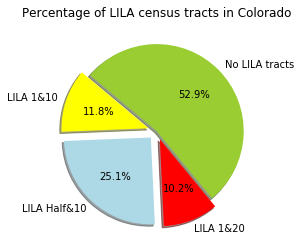

In [99]:
#Pie chart to represent the percentage of LILA tracts within the whole Tract count of Colorado
# Set up labels of the LILA tracts and sue the counts from above to represent the whole
#save figure for slides
tracts = ['LILA 1&10','LILA Half&10','LILA 1&20','No LILA tracts']
tract_count = [lila_count,half_count,twenty_count,none_count]
colors = ['yellow','lightblue','red','yellowgreen']
explode = [0.1,0.1,0.1,0]
plt.pie(tract_count, explode=explode, labels=tracts, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Percentage of LILA census tracts in Colorado')
plt.savefig('Charts/TractsPie.png')

## Analysis of Pie Chart
Over half of the census tracts in Colorado have no LILA ranking. The 25% of LILA Half & ten points towards an lack of access in the Half Mile requirment in urban areas. Further analysis of food access in urban counties could provide more context to that finding. A comparison study of Colorado's urban LILA tracts with similar sized US cities could also provide information to how Colorado addresses it's food security. 

In [125]:
# Grab counts of LILA Tracts per County 
# Use groupby on county and sum the LILA Tracts Series per LILA Tract
county_1and10=food_df[['County', 'LILATracts_1And10']].groupby('County').sum()['LILATracts_1And10']
county_halfand10 = food_df[['County','LILATracts_halfAnd10']].groupby('County').sum()['LILATracts_halfAnd10']
county_1and20= food_df[['County','LILATracts_1And20']].groupby('County').sum()['LILATracts_1And20']
county_1and10
# Data ultimately didn't cover how you wanted the analysis to go

County
ADAMS         16
ALAMOSA        3
ARAPAHOE      13
ARCHULETA      0
BACA           1
              ..
SUMMIT         0
TELLER         0
WASHINGTON     1
WELD           7
YUMA           2
Name: LILATracts_1And10, Length: 64, dtype: int64

# Scatter Plot Census Tract Populations on Diabetes Rates, based on a tracts LILA ranking. 
Does LILA tract rating have an effect on the diabetes rates? 
Chart the Tracts population along the x-axis, and the Estimated Rates along the y-axis. 

The correlation between both factors is -0.33


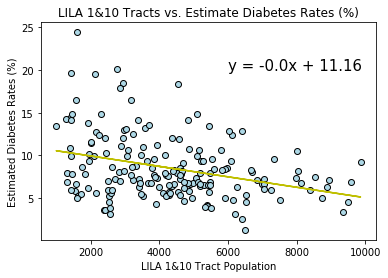

In [148]:
#Scatter plotting each LILA Tract on tracts population and Estimated Rate
#set x and y value, use linregress with (x,y) and set line eq
#plot and annotate using format discusses with group
#pearson r correlation, print f string

#LILA 1&10 scatter plot
x_value = lila1_10['Pop_Total']
y_value = lila1_10['Census_Tract_Estimate']
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value, marker="o", facecolors="lightblue", edgecolors="black")
plt.annotate(line_eq,(6000,20),fontsize=15,color="black")
plt.plot(x_value, regress_values, 'y-')
plt.title("LILA 1&10 Tracts vs. Estimate Diabetes Rates (%)")
plt.xlabel('LILA 1&10 Tract Population')
plt.ylabel("Estimated Diabetes Rates (%)")
correlation = st.pearsonr(x_value, y_value)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Charts/LILA10scatter.png')
plt.show()

The correlation between both factors is -0.28


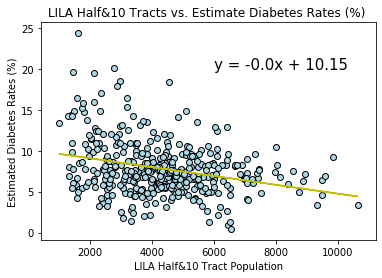

In [149]:
#lilahalf_10 scatter plot
lilahalf_pop = lilahalf_10['Pop_Total']
lilahalf_rate = lilahalf_10['Census_Tract_Estimate']
(slope,intercept,rvalue,pvalue,stderr) = linregress(lilahalf_pop, lilahalf_rate)
regress_values = lilahalf_pop * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6000,20),fontsize=15,color="black")
plt.plot(lilahalf_pop, regress_values, 'y-')
plt.scatter(lilahalf_pop,lilahalf_rate, marker='o', facecolors='lightblue', edgecolors='black')
plt.title('LILA Half&10 Tracts vs. Estimate Diabetes Rates (%) ')
plt.xlabel('LILA Half&10 Tract Population')
plt.ylabel('Estimated Diabetes Rates (%)')
correlation = st.pearsonr(lilahalf_pop, lilahalf_rate)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Charts/LILAhalfscatter.png')
plt.show()

The correlation between both factors is -0.3


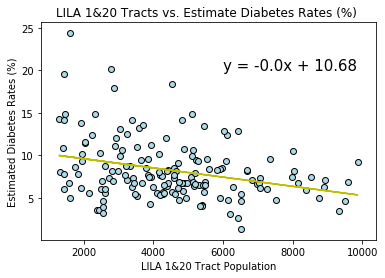

In [150]:
#lila1_20 scatter plot 
lila20_pop = lila1_20['Pop_Total']
lila20_rate = lila1_20['Census_Tract_Estimate']
(slope,intercept,rvalue,pvalue,stderr) = linregress(lila20_pop, lila20_rate)
regress_values = lila20_pop * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6000,20),fontsize=15,color="black")
plt.plot(lila20_pop, regress_values, 'y-')
plt.scatter(lila20_pop,lila20_rate, marker='o', facecolors='lightblue', edgecolors='black')
plt.title('LILA 1&20 Tracts vs. Estimate Diabetes Rates (%) ')
plt.xlabel('LILA 1&20 Tract Population')
plt.ylabel('Estimated Diabetes Rates (%)')
correlation = st.pearsonr(lila20_pop, lila20_rate)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Charts/LILA20scatter.png')
plt.show()

The correlation between both factors is -0.09


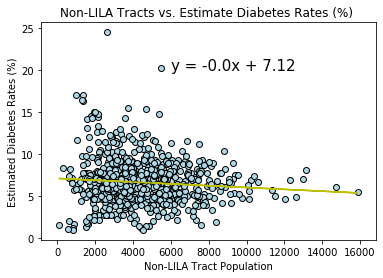

In [151]:
#lila_none scatter plot 
lilanone_pop = lila_none['Pop_Total']
lilanone_rate = lila_none['Census_Tract_Estimate']
(slope,intercept,rvalue,pvalue,stderr) = linregress(lilanone_pop, lilanone_rate)
regress_values = lilanone_pop * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6000,20),fontsize=15,color="black")
plt.plot(lilanone_pop, regress_values, 'y-')
plt.scatter(lilanone_pop,lilanone_rate, marker='o', facecolors='lightblue', edgecolors='black')
plt.title('Non-LILA Tracts vs. Estimate Diabetes Rates (%) ')
plt.xlabel('Non-LILA Tract Population')
plt.ylabel('Estimated Diabetes Rates (%)')
correlation = st.pearsonr(lilanone_pop, lilanone_rate)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Charts/LILANonescatter.png')
plt.show()

## Analysis of Scatter Plots of LILA tract population & Diabetes Rates
There is a negative correlation amongst all three graphs that indicate a lower percentage rate of diabetes as a Census tract increases in population. The data also shows a higher variance among the lower population tracts. Could small pockets of higher diagnosis rates in smaller Colorado communities be affecting the data? What variables in the larger population tracts are bringing the estimated rates down? A look at educational and health resources in the higher populated areas could provide a frame work for lower populated communities to follow. 

# Scatter Plot of LILA Tracts (Urban/Rural) Population & Diabetes Rates
Previous data analysis showed a higher variance of data points amongst the lower population census tracts. To follow that trend, graphing the Urban and Rural data points seperately would allow for more visualization of the trends. The dataframe allows us to seperate each census tract by it's LILA designation and it's Urban/Rural ranking. 

In [194]:
# seperating the data along the LILA Tract and it's Urban/Rural designation

# Urban data
urban_ten = food_df[(food_df['LILATracts_1And10']==1)&(food_df['Urban']==1)]
urban_half = food_df[(food_df['LILATracts_halfAnd10']==1)&(food_df['Urban']==1)]
urban_twenty = food_df[(food_df['LILATracts_1And20']==1)&(food_df['Urban']==1)]
urban_none = food_df[(food_df['LILATracts_1And10']==0)&(food_df['LILATracts_halfAnd10']==0)\
                            &(food_df['LILATracts_1And20']==0)&(food_df['Urban']==1)]
# Rural data
rural_ten = food_df[(food_df['LILATracts_1And10']==1)&(food_df['Rural']==1)]
rural_half = food_df[(food_df['LILATracts_halfAnd10']==1)&(food_df['Rural']==1)]
rural_twenty = food_df[(food_df['LILATracts_1And20']==1)&(food_df['Rural']==1)]
rural_none = food_df[(food_df['LILATracts_1And10']==0)&(food_df['LILATracts_halfAnd10']==0)&\
                            (food_df['LILATracts_1And20']==0)&(food_df['Rural']==1)]


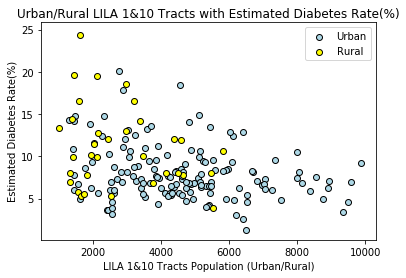

In [204]:
# LILA 1&10 Urban vs Rural SCatter plotting
x_value = urban_ten['Pop_Total']
y_value = urban_ten['Census_Tract_Estimate']

rural_x = rural_ten['Pop_Total']
rural_y = rural_ten['Census_Tract_Estimate']
# plt.scatter for both urban and rural dataframes
plt.scatter(x_value,y_value, marker='o', facecolors='lightblue', edgecolors='black',label="Urban")
plt.scatter(rural_x,rural_y, marker='o', facecolors='yellow',edgecolors='black',label='Rural')
plt.legend(loc='upper right')
plt.title('Urban/Rural LILA 1&10 Tracts with Estimated Diabetes Rate(%)')
plt.xlabel('LILA 1&10 Tracts Population (Urban/Rural)')
plt.ylabel('Estimated Diabetes Rate(%)')
plt.savefig('Charts/Urban-Rural_1-10LILA.png')
plt.show()

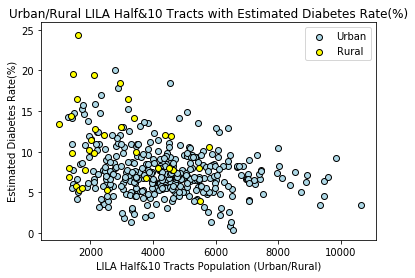

In [203]:
urban_x = urban_half['Pop_Total']
urban_y = urban_half['Census_Tract_Estimate']

rural_x = rural_half['Pop_Total']
rural_y = rural_half['Census_Tract_Estimate']
plt.scatter(urban_x, urban_y, marker='o', facecolors='lightblue', edgecolors='black',label='Urban')
plt.scatter(rural_x, rural_y, marker='o', facecolors='yellow', edgecolors='black',label='Rural')
plt.legend(loc='upper right')
plt.title('Urban/Rural LILA Half&10 Tracts with Estimated Diabetes Rate(%)')
plt.xlabel('LILA Half&10 Tracts Population (Urban/Rural)')
plt.ylabel('Estimated Diabetes Rate(%)')
plt.savefig('Charts/Urban-Rural_half-10.png')
plt.show()

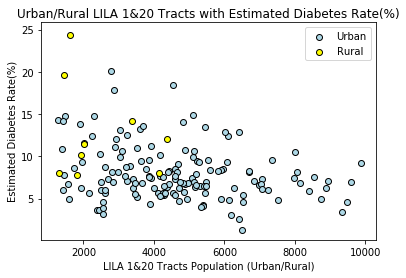

In [202]:
urban_x = urban_twenty['Pop_Total']
urban_y = urban_twenty['Census_Tract_Estimate']

rural_x = rural_twenty['Pop_Total']
rural_y = rural_twenty['Census_Tract_Estimate']
plt.scatter(urban_x, urban_y, marker='o', facecolors='lightblue', edgecolors='black',label='Urban')
plt.scatter(rural_x, rural_y, marker='o', facecolors='yellow', edgecolors='black',label='Rural')
plt.legend(loc='upper right')
plt.title('Urban/Rural LILA 1&20 Tracts with Estimated Diabetes Rate(%)')
plt.xlabel('LILA 1&20 Tracts Population (Urban/Rural)')
plt.ylabel('Estimated Diabetes Rate(%)')
plt.savefig('Charts/Urban-Rural_1-20.png')
plt.show()

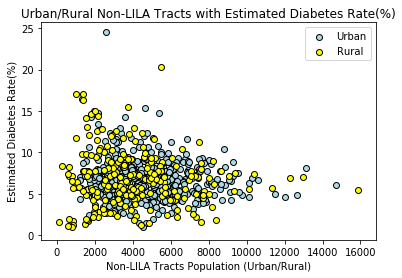

In [201]:
urban_x = urban_none['Pop_Total']
urban_y = urban_none['Census_Tract_Estimate']

rural_x = rural_none['Pop_Total']
rural_y = rural_none['Census_Tract_Estimate']
plt.scatter(urban_x, urban_y, marker='o', facecolors='lightblue', edgecolors='black',label='Urban')
plt.scatter(rural_x, rural_y, marker='o', facecolors='yellow', edgecolors='black',label='Rural')
plt.legend(loc='upper right')
plt.title('Urban/Rural Non-LILA Tracts with Estimated Diabetes Rate(%)')
plt.xlabel('Non-LILA Tracts Population (Urban/Rural)')
plt.ylabel('Estimated Diabetes Rate(%)')
plt.savefig('Charts/Urban-Rural_none.png')
plt.show()

## Analysis of Urban/Rural seperated census tracts 
The rural census tracts in Colorado exibit a higher percentage rate of diabetes on average. Further statistical analysis of that data could provide more context to this observation. Mapping these data points would allow for more exploration of the food environment in each census tract. Areas with a LILA tract could then be incentivized to provide a more robust option to it's citizens along food choices. 